In [70]:
import scipy.optimize as opt
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
np.random.seed(42)


In [71]:
def cube_func(x):
    return x**3

def abs_func(x):
    return abs(x-0.2)

def sin_x_func(x):
    return x * np.sin(1/x)

eps = 1e-3

In [72]:
def search(left, right, eps, func):
    x = np.linspace(left, right, int((right-left)/eps) + 1)
    values = np.array(list(map(func, x)))
    min = np.argmin(values)
    arg = x[min]
    min_value = func(arg)
    func_calls = int((right-left)/eps) + 1
    iters = func_calls
    return arg, min_value, iters, func_calls

print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*search(0.01, 1, eps, sin_x_func)))

arg = 0.0000, min value = 0.0000, # iters = 1001, # function calls = 1001
arg = 0.2000, min value = 0.0000, # iters = 1001, # function calls = 1001
arg = 0.2230, min value = -0.2172, # iters = 991, # function calls = 991


In [73]:
def dichotomy(left, right, eps, func):
    delta = eps / 2
    iters = 0
    func_calls = 0
    x1 = (left + right - delta ) / 2
    x2 = (left + right + delta ) / 2
    while abs(left - right) > eps:
        if func(x1) <= func(x2):
            right = x2
        else:
            left = x1
        x1 = (left + right - delta ) / 2
        x2 = (left + right + delta ) / 2
        iters += 1
        func_calls += 2
    arg = (x1 + x2) /2
    min_value = func(arg)
    return arg, min_value, iters, func_calls

print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*dichotomy(0.01, 1, eps, sin_x_func)))
    

arg = 0.0005, min value = 0.0000, # iters = 11, # function calls = 22
arg = 0.2001, min value = 0.0001, # iters = 11, # function calls = 22
arg = 0.2226, min value = -0.2172, # iters = 11, # function calls = 22


In [74]:
def golden_section(left, right, eps, func):
    iters = 0
    func_calls = 0
    x1 = left + (3 - 5**0.5)/2 * (right - left)
    x2 = right + (5**0.5 - 3)/2 * (right - left)
    while abs(left - right) > eps:
        if func(x1) <= func(x2):
            right = x2
        else:
            left = x1
        x1 = left + (3 - 5**0.5)/2 * (right - left)
        x2 = right + (5**0.5 - 3)/2 * (right - left)
        iters += 1
        func_calls += 2
    arg = (x1 + x2) /2
    min_value = func(arg)
    return arg, min_value, iters, func_calls

print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*golden_section(0, 1, eps, cube_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*golden_section(0, 1, eps, abs_func)))
print('arg = {:.4f}, min value = {:.4f}, # iters = {}, # function calls = {}'.format(*golden_section(0.01, 1, eps, sin_x_func)))

arg = 0.0004, min value = 0.0000, # iters = 15, # function calls = 30
arg = 0.2001, min value = 0.0001, # iters = 15, # function calls = 30
arg = 0.2227, min value = -0.2172, # iters = 15, # function calls = 30


In [75]:
alpha = np.random.rand(1)
beta = np.random.rand(1)
alpha, beta

x = np.linspace(0, 1, 101)
yk = alpha * x + beta + np.random.randn(101)


In [76]:
def linear_approx(x, a, b):
    def linear(x, a, b):
        return a*x + b
    return np.array(list(map(partial(linear, a=a, b=b), x)))


def rational_approx(x, a, b):
    def rational(x, a, b):
        denominator = 1 + x * b
        return a / denominator
    return np.array(list(map(partial(rational, a=a, b=b), x)))


def cost_func(params, gt, x, func_name):
    a, b = params
    if func_name == 'linear':
        return sum((gt - linear_approx(x, a, b))**2)

    value = sum((gt - rational_approx(x, a, b))**2)
    return value


In [77]:
# def search(x, y, eps, func):
#     a_values = np.linspace(-1, 1, int(1 / eps) + 1)
#     b_values = np.linspace(-1, 1, int(1 / eps) + 1)
#     values = np.zeros((len(a_values), len(b_values)))
#     for i, a in tqdm(enumerate(a_values)):
#         for j, b in enumerate(b_values):
#             values[i, j] = cost_func((a, b), y, x, func)

#     min = np.unravel_index(np.nanargmin(values), values.shape)
#     arg = a_values[min[0]], b_values[min[1]]
#     min_value = cost_func(arg, y, x, func)
#     func_calls = len(a_values) * len(b_values)
#     iters = func_calls
#     return arg, min_value, iters, func_calls


In [78]:
res_search_linear = opt.brute(cost_func, [[0, 1], [0, 1]], args=(yk, x, 'linear'), Ns=int(1/eps))

res_gauss_linear = opt.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), method='Powell')
res_nelder_mead_linear = opt.minimize(cost_func, [0, 0], args=(yk, x, 'linear'), method='Nelder-Mead')

print(res_gauss_linear)
print(res_nelder_mead_linear)


   direc: array([[ 0.        ,  1.        ],
       [-0.88004242,  0.44002121]])
     fun: 83.07382697914976
 message: 'Optimization terminated successfully.'
    nfev: 101
     nit: 3
  status: 0
 success: True
       x: array([0.43877713, 0.79065687])
 final_simplex: (array([[0.43873723, 0.79068031],
       [0.43881698, 0.79062968],
       [0.43880484, 0.79066188]]), array([83.07382699, 83.073827  , 83.07382702]))
           fun: 83.0738269940531
       message: 'Optimization terminated successfully.'
          nfev: 129
           nit: 66
        status: 0
       success: True
             x: array([0.43873723, 0.79068031])


[0.43879537 0.79066353]


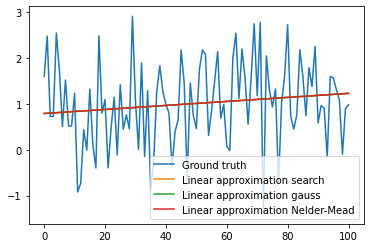

In [83]:

plt.plot(yk)
plt.plot(linear_approx(x, *res_search_linear))
plt.plot(linear_approx(x, *res_gauss_linear.x))
plt.plot(linear_approx(x, *res_nelder_mead_linear.x))
plt.legend(['Ground truth', 'Linear approximation search',
           'Linear approximation gauss', 'Linear approximation Nelder-Mead'])


In [84]:
res_search_rational = opt.brute(cost_func, [[-1, 1], [-1, 1]], args=(yk, x, 'rational'), Ns=int(1/eps))
res_gauss_rational = opt.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Powell', tol=eps, bounds=[[-1, 1], [-1, 1]])
res_nelder_mead_rational = opt.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Nelder-Mead', tol=eps, bounds=[[-1, 1], [-1, 1]])

print(res_search_rational)
print(res_gauss_rational)
print(res_nelder_mead_rational)


C:\Users\morko\AppData\Local\Temp/ipykernel_16948/485214572.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return a / denominator


C:\Users\morko\AppData\Local\Temp/ipykernel_16948/485214572.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return a / denominator


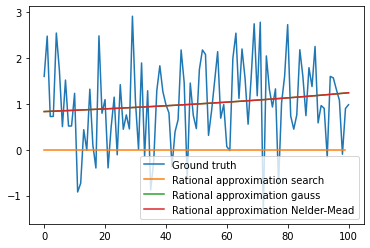

In [ ]:

plt.plot(yk)
plt.plot(rational_approx(x, *res_search_rational))
plt.plot(rational_approx(x, *res_gauss_rational.x))
plt.plot(rational_approx(x, *res_nelder_mead_rational.x))
plt.legend(['Ground truth', 'Rational approximation search',
           'Rational approximation gauss', 'Rational approximation Nelder-Mead'])